In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis, zscore

In [3]:
df = pd.read_csv("C:/Users/lesin/Documents/Python Projects/Jupytor/house_price.csv")

In [5]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [9]:
print(df.head(10))

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   
5                Whitefield      2 BHK      1170.0   2.0   38.00    2   
6          Old Airport Road      4 BHK      2732.0   4.0  204.00    4   
7              Rajaji Nagar      4 BHK      3300.0   4.0  600.00    4   
8              Marathahalli      3 BHK      1310.0   3.0   63.25    3   
9                     other  6 Bedroom      1020.0   6.0  370.00    6   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  
5            3247  
6            7467  
7           18181  
8            482

In [11]:
# Q1. Perform basic EDA

In [13]:
print("Basic EDA")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print("Missing values:", df.isnull().sum())
print("Summary statistics:", df.describe())

Basic EDA
Shape of dataset: (13200, 7)
Columns: Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')
Missing values: location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64
Summary statistics:          total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40

In [15]:
# Q2. Detect the outliers using following methods and remove it using methods like trimming / capping/ imputation using mean or median

In [17]:
# a) Mean and Standard deviation

In [19]:
col = 'price_per_sqft'
mean = df[col].mean()
std =  df[col].std()
lower_limit = mean - 3*std
upper_limit = mean + 3*std
mean_std_data = df[(df[col] >= lower_limit) & (df[col] <= upper_limit)][col]

In [21]:
print(mean)
print(std)
print(lower_limit)
print(upper_limit)
print(mean_std_data)

7920.336742424242
106727.16032810845
-312261.1442419011
328101.8177267496
0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13195, dtype: int64


In [23]:
# b)Percentile method

In [25]:
lower_percentile = df[col].quantile(0.05)
upper_percentile = df[col] = df[col].quantile (0.95)
percentile_data = df[(df[col] >= lower_percentile) & (df[col] <= upper_percentile)][col]
print(lower_percentile)
print(upper_percentile)
print(percentile_data)

3107.8500000000004
15312.099999999984
0        15312.1
1        15312.1
2        15312.1
3        15312.1
4        15312.1
          ...   
13195    15312.1
13196    15312.1
13197    15312.1
13198    15312.1
13199    15312.1
Name: price_per_sqft, Length: 13200, dtype: float64


In [27]:
# c) IQR(Inter quartile range method)

In [29]:
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower_fence = 1.5 * IQR
upper_fence = 1.5 * IQR
iqr_data = df[(df[col] >= lower_fence) & (df[col] <=upper_fence)][col]

In [31]:
print(Q1)
print(Q3)
print(IQR)
print(lower_fence)
print(upper_fence)
print(iqr_data)

15312.099999999984
15312.099999999984
0.0
0.0
0.0
Series([], Name: price_per_sqft, dtype: float64)


In [33]:
# d) Z Score method

In [35]:
z_scores = zscore(df[col])
z_data = df[(np.abs(z_scores) < 3)][col]
z_scores

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
13195   NaN
13196   NaN
13197   NaN
13198   NaN
13199   NaN
Name: price_per_sqft, Length: 13200, dtype: float64

In [37]:
# Q3. Create a box plot and use this to determine which method seems to work best to remove outliers for this data?

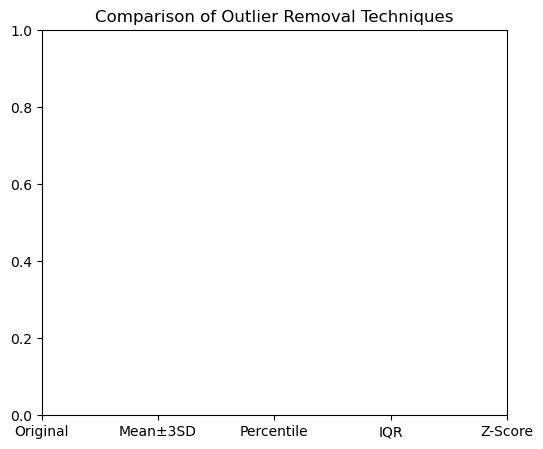

In [41]:
original_data = df[col].copy()
plt.figure(figsize=(6,5))
sns.boxplot(data = [original_data, mean_std_data, percentile_data, iqr_data, z_data])
plt.xticks([0,1,2,3,4], ['Original', 'Mean±3SD', 'Percentile', 'IQR', 'Z-Score'])
plt.title("Comparison of Outlier Removal Techniques")
plt.show()

In [43]:
# Q4. Draw histplot to check the normality of the column(price per sqft column) and perform transformations if needed. 
# Check the skewness and kurtosis before and after the transformation.

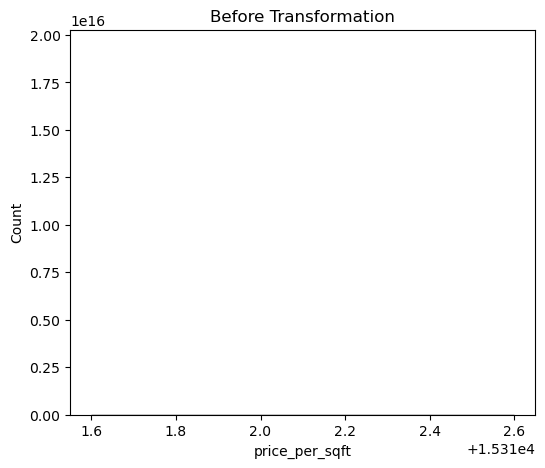

In [47]:
from scipy.stats import boxcox

# Histogram beforetransformation
plt.figure(figsize=(6,5))
sns.histplot(original_data,kde = True)
plt.title('Before Transformation')
plt.show()

In [49]:
print("Skewness (before):", skew(original_data))
print("Kurtosis (before):",kurtosis(original_data))

Skewness (before): nan
Kurtosis (before): nan


C:\Users\lesin\AppData\Local\Temp\ipykernel_24908\3384758730.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print("Skewness (before):", skew(original_data))
C:\Users\lesin\AppData\Local\Temp\ipykernel_24908\3384758730.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print("Kurtosis (before):",kurtosis(original_data))


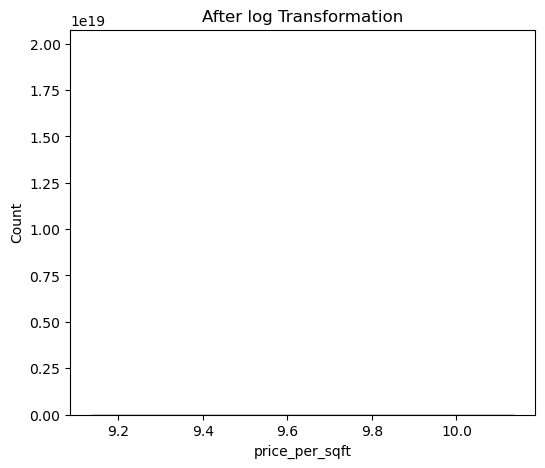

In [51]:
transformed_data = np.log1p(original_data)

plt.figure(figsize = (6,5))
sns.histplot(transformed_data, kde =True)
plt.title('After log Transformation')
plt.show()

In [53]:
print("Skewness after:", skew(original_data))
print("Kurtosis before:", kurtosis(original_data))

Skewness after: nan
Kurtosis before: nan


C:\Users\lesin\AppData\Local\Temp\ipykernel_24908\1524520427.py:1: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print("Skewness after:", skew(original_data))
C:\Users\lesin\AppData\Local\Temp\ipykernel_24908\1524520427.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  print("Kurtosis before:", kurtosis(original_data))


In [55]:
# Q5. Check the correlation between all the numerical columns and plot heatmap. 

In [57]:
numeric_df = df.select_dtypes(include = [np.number])
correlation = numeric_df.corr()

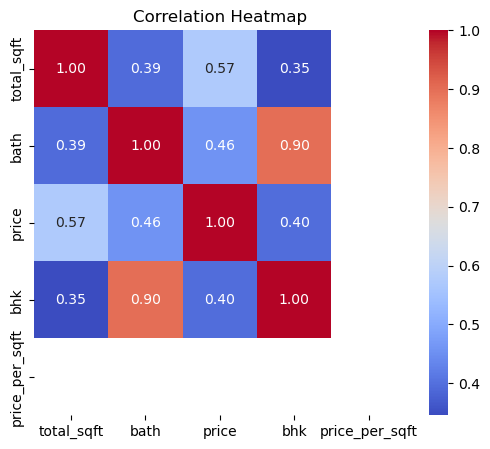

In [61]:
plt.figure(figsize= (6,5))
sns.heatmap(correlation, annot= True, cmap= 'coolwarm', fmt = '.2f')
plt.title("Correlation Heatmap")
plt.show()

In [63]:
# Q6. Draw Scatter plot between the variables to check the correlation between them.

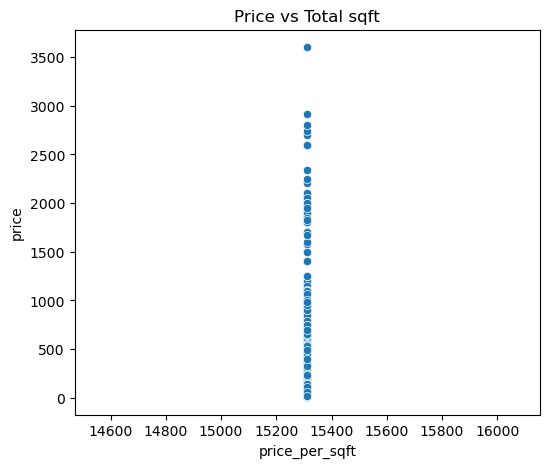

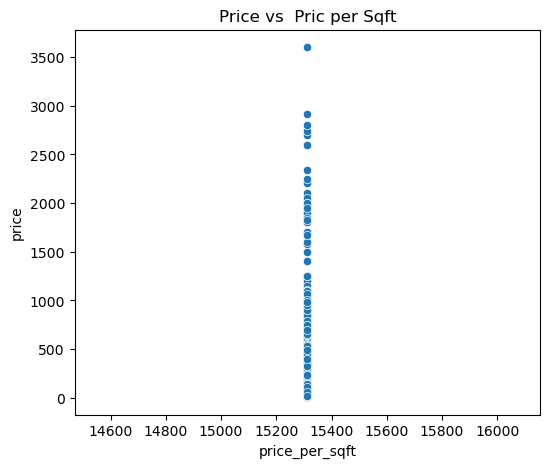

In [67]:
if 'price' in df.columns and 'total_sqft' in df.columns:
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x='price_per_sqft', y= 'price')
    plt.title('Price vs Total sqft')
    plt.show()

    plt.figure(figsize= (6,5))
    sns.scatterplot(data=df, x ='price_per_sqft', y='price')
    plt.title('Price vs  Pric per Sqft')
    plt.show()
else:
    print("Columns'price' and 'total_sqft' not found for scatter plots.")